# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

**Purpose:** *To learn about Linear Filters and Local Image Features and its use in computer vision (image processing). Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

The theory for this exercise can be found in chapter 5 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)


**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done by hand on paper until you are confident that you know how to do it.** 

Thereafter you can use the notebook to complete and check the results.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
\begin{equation}\label{L3-eq6}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}

The **Prewitt masks**:
\begin{equation}\label{L3-eq7}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.

Consider the following image:

\begin{equation}\label{Lab2eq6}
    {\mathbf Im} = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 1 & 0\\
        0 & 0 & 1 & 1 & 0 & 0\\0 & 0 & 1 & 1 & 0 & 0\\
        0 & 1 & 0 & 0 & 1 & 0\\0 & 0 &  0 & 0 & 0 & 0\end{bmatrix}.
\end{equation}





In [1]:
import numpy as np
from skimage import filters, data
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
inputImage = np.array([[0, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 1, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0]])

**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

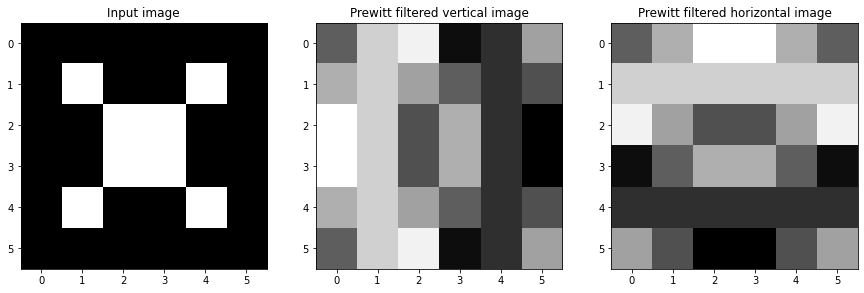

In [2]:
# prewittMaskX = np.array([[1, 0, -1],
#                          [1, 0, -1],
#                          [1, 0, -1]])

# prewittMaskY = np.array([[1, 1, 1],
#                          [0, 0, 0],
#                          [-1, -1, -1]])

dx, dy = ndimage.prewitt(inputImage, axis=0), ndimage.prewitt(inputImage, axis=1)
prewittFilteredImage = np.hypot(dx, dy)
prewittFilteredImage = prewittFilteredImage / np.max(prewittFilteredImage)
prewittFilterVerticalImage = filters.prewitt_v(prewittFilteredImage)
prewittFilterHorizontalImage = filters.prewitt_h(prewittFilteredImage)


plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(inputImage, cmap='gray')
plt.title('Input image')
plt.subplot(132)
plt.imshow(prewittFilterVerticalImage, cmap='gray')
plt.title('Prewitt filtered vertical image')
plt.subplot(133)
plt.imshow(prewittFilterHorizontalImage, cmap='gray')
plt.title('Prewitt filtered horizontal image')
plt.show();

**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

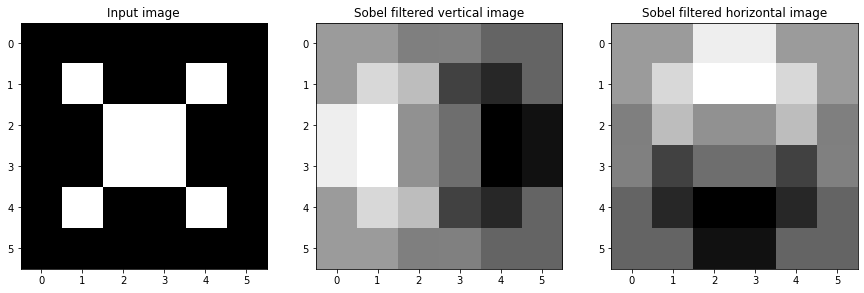

In [3]:
# sobelMaskX = np.array([[1, 0, -1],
#                       [2, 0, -2],
#                       [1, 0, -1]])

# sobelMaskY = np.array([[1, 2, 1],
#                        [0, 0, 0],
#                        [-1, -2, -1]])
dx, dy = ndimage.sobel(inputImage, axis=0), ndimage.sobel(inputImage, axis=1)
sobelFilteredImage = np.hypot(dx, dy)
sobelFilteredImage = sobelFilteredImage / np.max(sobelFilteredImage)
sobelFilterVerticalImage = filters.sobel_v(sobelFilteredImage)
sobelFilterHorizontalImage = filters.sobel_h(sobelFilteredImage)


plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(inputImage, cmap='gray')
plt.title('Input image')
plt.subplot(132)
plt.imshow(sobelFilterVerticalImage, cmap='gray')
plt.title('Sobel filtered vertical image')
plt.subplot(133)
plt.imshow(sobelFilterHorizontalImage, cmap='gray')
plt.title('Sobel filtered horizontal image')
plt.show();


**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


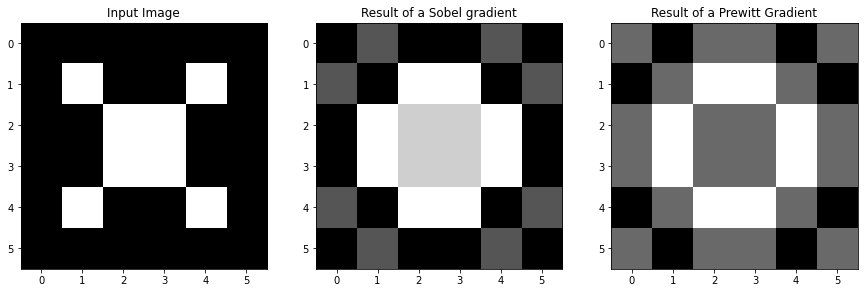

In [4]:
sobelGradient = filters.sobel(inputImage)
prewittGradient = filters.prewitt(inputImage)


plt.figure(figsize=(15,7))
plt.subplot(131)
plt.imshow(inputImage, cmap='gray')
plt.title('Input Image')
plt.subplot(132)
plt.imshow(sobelGradient, cmap='gray')
plt.title('Result of a Sobel gradient')
plt.subplot(133)
plt.imshow(prewittGradient, cmap='gray')
plt.title('Result of a Prewitt Gradient')
plt.show();

# reference
# https://notebook.community/thetdg/PyImage/.ipynb_checkpoints/Image_Processing_in_Python-checkpoint


**e)** How will you interpret the results with respect to edges in the test image?

In [5]:
# Prewitt filter: The Prewitt operator is a discrete differentiation operator which functions similar to the Sobel operator,
#                 by computing the gradient for the image intensity function. Makes use of the maximum directional gradient.
#                 As compared to Sobel, the Prewitt masks are simpler to implement but are very sensitive to noise.

# Sobel filter:   Detects edges are where the gradient magnitude is high.This makes the Sobel edge detector more sensitive
#                 to diagonal edge than horizontal and vertical edges. 




# Sobel filter gives a better performance than other Prewitt.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $6 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $10 \times 12$. 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
<div class="alert alert-block alert-info">
The test image can be created by the following numpy commands: 
    
```python
R = np.ones(shape=(6,8))
I = np.zeros(shape=(10,12))
I[2:8,2:10] = R
```
</div>
</details>



Use the notebook to do the necessary computations in the following questions.

Use the Prewitt masks:
\begin{equation}\label{L4-eq1}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 


<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
Use <code>cv2.filter2D</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">Documentation</a>) to perform a convolutional operation on an image using a specific mask.

</details>

In [6]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt 
import cv2

 Input image: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
 Differentials Ix: 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0. -2. -2.  0.  0.  0.  0.  0.  0.  2.  2.  0.]
 [ 0. -3. -3.  0.  0.  0.  0.  0.  0.  3.  3.  0.]
 [ 0. -3. -3.  0.  0.  0.  0.  0.  0.  3.  3.  0.]
 [ 0. -3. -3.  0.  0.  0.  0.  0.  0.  3.  3.  0.]
 [ 0. -3. -3.  0.  0.  0.  0.  0.  0.  3.  3.  0.]
 [ 0. -2. -2.  0.  0.  0.  0.  0.  0.  2.  2.  0.]
 [ 0. -1. -1.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
 Differentials Iy: 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0

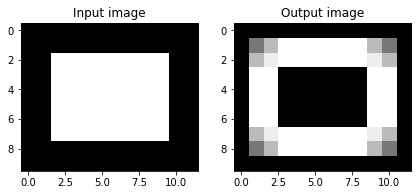

 Output image: 
 [[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.4 2.2 3.  3.  3.  3.  3.  3.  2.2 1.4 0. ]
 [0.  2.2 2.8 3.  3.  3.  3.  3.  3.  2.8 2.2 0. ]
 [0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  3.  0. ]
 [0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  3.  0. ]
 [0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  3.  0. ]
 [0.  3.  3.  0.  0.  0.  0.  0.  0.  3.  3.  0. ]
 [0.  2.2 2.8 3.  3.  3.  3.  3.  3.  2.8 2.2 0. ]
 [0.  1.4 2.2 3.  3.  3.  3.  3.  3.  2.2 1.4 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [7]:
R = np.ones(shape=(6,8))
I = np.zeros(shape=(10,12))
I[2:8,2:10] = R
hx  = np.array([[1, 0, -1],
                [1, 0, -1],
                [1, 0, -1]])

hy = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1,-1,-1]])

differentialsIx = cv2.filter2D(I, -1, hx)
differentialsIy = cv2.filter2D(I, -1, hy)

print ('\033[2;31;48m Input image: \033[0;0m\n', I)
print ('\033[2;31;48m Differentials Ix: \033[0;0m\n', differentialsIx)
print ('\033[2;31;48m Differentials Iy: \033[0;0m\n', differentialsIy)

finalImage = np.round(np.sqrt(pow(differentialsIx, 2)+pow(differentialsIy, 2)), 1)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('Input image')
plt.subplot(222)
plt.imshow(finalImage ,cmap='gray')
plt.title('Output image')
plt.show()

print ('\033[2;31;48m Output image: \033[0;0m\n', finalImage)


**b)** Sketch the histogram of gradient directions (**in degrees**).

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

The <code>numpy.arctan2</code> function (<a href="https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html">Documentation</a>) might be useful for this task to convert the x-y coordinates into radiants. 

</details>

The Laplacian can be computed using the following mask:
\begin{equation}\label{L4-eq2}
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.


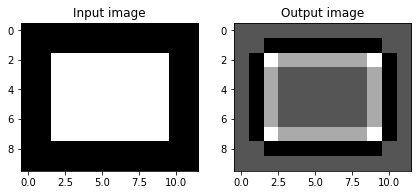

 Laplacian image: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
hL  = np.array([[0, -1, 0],
                [-1, 4, -1],
                [0, -1, 0]])

differentialshL = cv2.filter2D(I, -1, hL)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('Input image')
plt.subplot(222)
plt.imshow(differentialshL ,cmap='gray')
plt.title('Output image')
plt.show()

print ('\033[2;31;48m Laplacian image: \033[0;0m\n', I)

**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    </font>
</summary>

- Import the <code>scipy</code>  package and use the <code>convolve2d</code> function (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">Documentation</a>) for this task.

- If you want to check if the resulting mask is correct, use the built-in cv2 <code>cv2.Laplacian(I, -1, ksize=5)</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6">Documentation</a>) where <code>I</code> is the test image and <code>ksize</code> is the aperture size used to compute the second-derivative filters. The visualization of the two masks should be almost identical (although the pixel values are different).
</details>


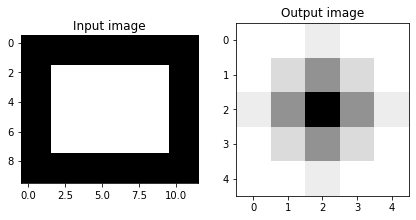

 Resulting mask: 
 [[  2   2   1   2   2]
 [  2   0  -4   0   2]
 [  1  -4 -12  -4   1]
 [  2   0  -4   0   2]
 [  2   2   1   2   2]]


In [9]:
import scipy.signal
from scipy import signal
differentialshL = scipy.signal.convolve2d(hx, hx) + signal.convolve2d(hy, hy)

plt.figure(figsize=(7,7))
plt.subplot(221)
plt.imshow(I, cmap='gray')
plt.title('Input image')
plt.subplot(222)
plt.imshow(differentialshL ,cmap='gray')
plt.title('Output image')
plt.show()

print ('\033[2;31;48m Resulting mask: \033[0;0m\n', differentialshL)



## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h1**: $\sigma = 1$, $K = 9$

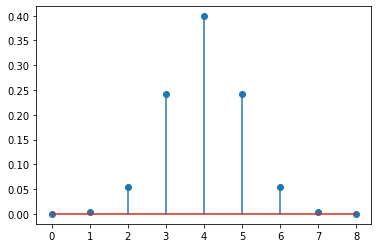

In [10]:
sigma = 1
k = 9
h1 = cv2.getGaussianKernel(k, sigma)
plt.stem(h1)
plt.show();

**b)** **h15**: $\sigma = 1.5$, $K = 11$

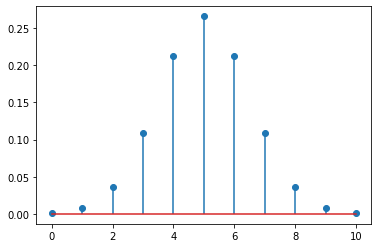

In [11]:
sigma = 1.5
k = 11
h15 = cv2.getGaussianKernel(k, sigma)
plt.stem(h15)
plt.show();

**c)** **h2**: $\sigma = 2$, $K = 15$

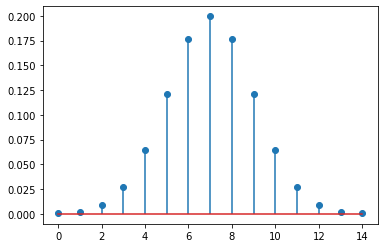

In [12]:
sigma = 2
k = 15
h2 = cv2.getGaussianKernel(k, sigma)
plt.stem(h2)
plt.show();

Use the `plt.stem()` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

**d)** Show the result for c) above when $K = 9$.

If we want a proper Gaussian filter there is a connection between the value of $\sigma$ and the size $K$. 
At three standard deviations, $3\sigma$, the value of the Gaussian is 1\% of its maximum value.


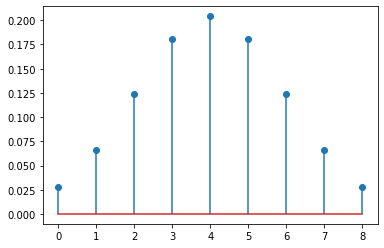

In [13]:
sigma = 2
k = 9
h2d = cv2.getGaussianKernel(k, sigma)
plt.stem(h2d)
plt.show();


## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 
```python
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0.05, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels
```

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

You can filter an image with the OpenCV built-in functions in three different ways: 

- Use <code>cv2.sepFilter2D()</code> using the <code>kernelX</code> and <code>kernelY</code> parameters.

- Use the <code>cv2.filter2D()</code> using a 2D filter. 

- Perform 2 steps of <code>cv2.filter2D()</code> with the same(*) 1D filter.

(*) The second time, the 1D filter should be transposed.
</details>



In [14]:
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0.05, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels

**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problem 3. Explain the results.

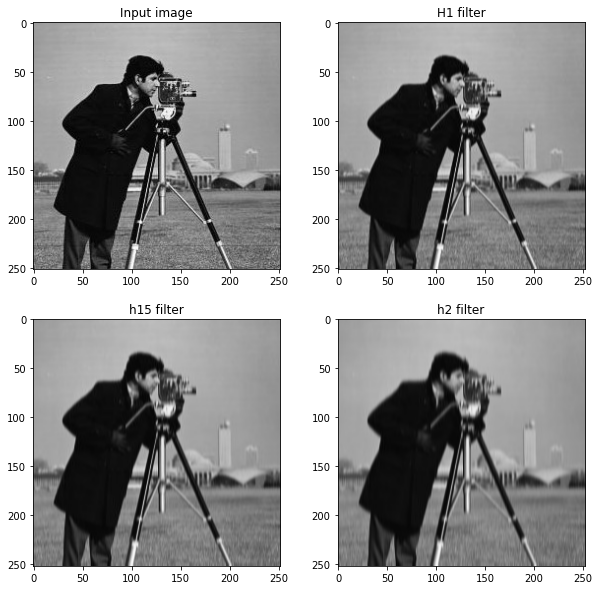

In [15]:
Im1 = cv2.filter2D(Im, -1, h1)
Im15 = cv2.filter2D(Im, -1, h15)
Im2 = cv2.filter2D(Im, -1, h2)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Im)
plt.title("Input image")
plt.subplot(222)
plt.imshow(Im1)
plt.title("H1 filter")
plt.subplot(223)
plt.imshow(Im15)
plt.title("h15 filter")
plt.subplot(224)
plt.imshow(Im2)
plt.title("h2 filter")
plt.show()

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problem 3, to the image `Im_gauss`. Explain the results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


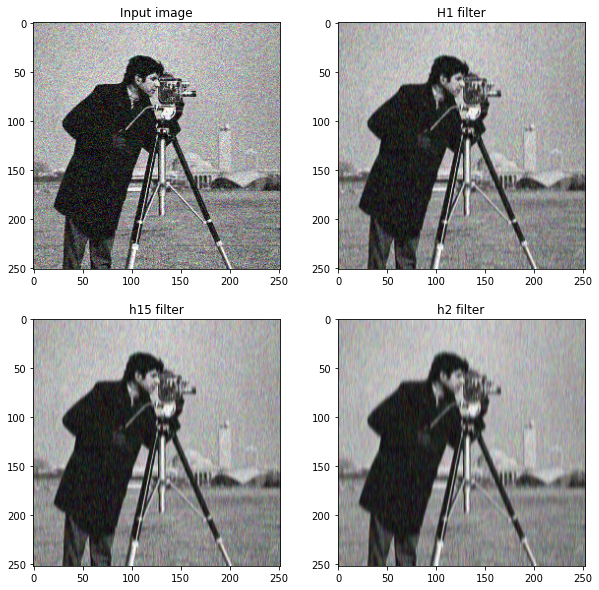

In [16]:
Im1 = cv2.filter2D(Im_gauss, -1, h1)
Im15 = cv2.filter2D(Im_gauss, -1, h15)
Im2 = cv2.filter2D(Im_gauss, -1, h2)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Im_gauss)
plt.title("Input image")
plt.subplot(222)
plt.imshow(Im1)
plt.title("H1 filter")
plt.subplot(223)
plt.imshow(Im15)
plt.title("h15 filter")
plt.subplot(224)
plt.imshow(Im2)
plt.title("h2 filter")
plt.show()

**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?


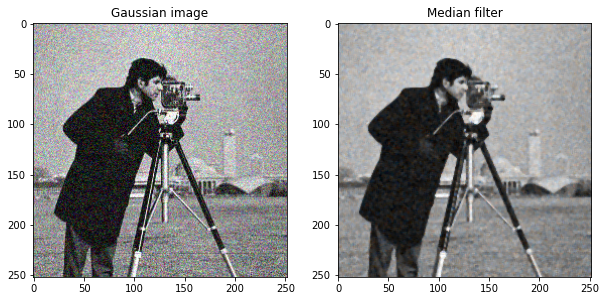

In [17]:
medianImage= scipy.ndimage.median_filter(Im_gauss,size=3)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Im_gauss)
plt.title("Gaussian image")
plt.subplot(122)
plt.imshow(medianImage)
plt.title("Median filter")
plt.show()


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problem 3, to the image `Im_SP`. Explain the results.

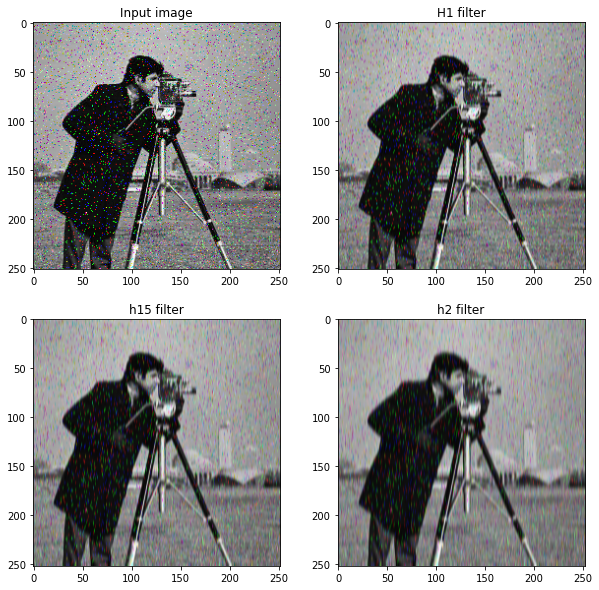

In [18]:
Im1 = cv2.filter2D(Im_SP, -1, h1)
Im15 = cv2.filter2D(Im_SP, -1, h15)
Im2 = cv2.filter2D(Im_SP, -1, h2)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(Im_SP)
plt.title("Input image")
plt.subplot(222)
plt.imshow(Im1)
plt.title("H1 filter")
plt.subplot(223)
plt.imshow(Im15)
plt.title("h15 filter")
plt.subplot(224)
plt.imshow(Im2)
plt.title("h2 filter")
plt.show()

**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

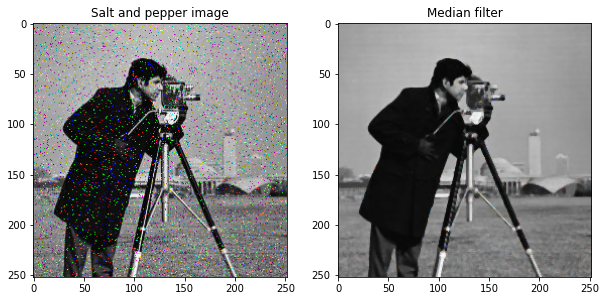

In [19]:
medianImage= scipy.ndimage.median_filter(Im_SP,size=3)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Im_SP)
plt.title("Salt and pepper image")
plt.subplot(122)
plt.imshow(medianImage)
plt.title("Median filter")
plt.show()


# This filter result is better than Gaussian filters.



### Delivery (dead line) on CANVAS: 03.10.2021 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
